/reg/d/psdm/cxi/cxilv0418/scratch/northeyt/xtcav_stats_run43.h5
<HDF5 file "xtcav_stats_run43.h5" (mode r)>


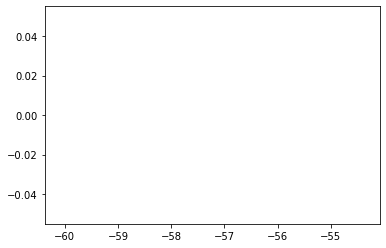

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
# import my functions
from define_experiment_run import experiment, run, scratch_dir, Nevents

# load h5 file
fname = '%sxtcav_stats_run%d.h5' % (scratch_dir, run)
print(fname)
f = h5py.File(fname, 'r')
print(f)
list(f.keys())
t1 = np.squeeze(f['t1'])
powerCOM = np.squeeze(f['powerCOM'])
n = 3
plt.plot(t1[n, :], powerCOM[, :])

In [17]:
n = 690
nvalid = Nevents - n
tmp = agreement[n:]
print('Equal 0:')
print(np.sum(tmp == 0))
print(np.sum(tmp > 0.9) / nvalid)
print(np.sum(tmp > 0.8) / nvalid)
print(np.sum(tmp > 0.5) / nvalid)

Equal 0:
508
0.2978517722878625
0.7749731471535983
0.9235230934479055


(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 5.080e+02,
        1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 4.000e+00,
        7.000e+00, 1.300e+01, 9.000e+00, 1.900e+01, 6.000e+00, 1.500e+01,
        2.100e+01, 2.100e+01, 1.500e+01, 1.700e+01, 3.100e+01, 2.600e+01,
        2.900e+01, 3.900e+01, 6.800e+01, 7.000e+01, 9.600e+01, 1.110e+02,
        1.260e+02, 1.540e+02, 2.260e+02, 3.630e+02, 4.590e+02, 8.260e+02,
        1.466e+03, 2.161e+03, 1.908e+03, 4.830e+02]),
 array([-0.16006638, -0.13203764, -0.10400891, -0.07598018, -0.04795144,
        -0.01992271,  0.00810603,  0.03613476,  0.06416349,  0.09219223,
         0.12022096,  0.1482497 ,  0.17627843,  0.20430716,  0.2323359 ,
         0.26036463,  0.28839336,  0.3164221 ,  0.34445083,  0.37247957,
         0.4005083 ,  0.42853703,  0.45656577,  0.4845945 ,  0.51262324,
         0.54065197,  0.5686807 ,  0.59670944,  0.62473817,  0.6527669 ,
         0.68079564,  0.70882437,  0.73685311,  0.76488184,  0.7

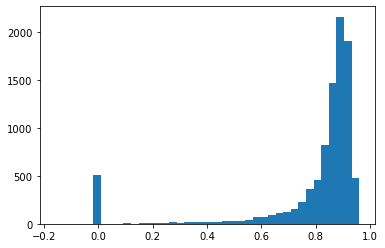

In [14]:
plt.hist(agreement[n:], bins=40)